In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
# Read into csv file
crash_data = pd.read_csv("Resources/Crash_Statistics_Victoria_clean.csv")
crash_data.head()

,OBJECTID,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,LIGHT_CONDITION,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,...,YOUNG_DRIVER,ALCOHOL_RELATED,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,RMA,STAT_DIV_NAME
0,3401744,1/07/2013,18.30.00,Yes,Struck Pedestrian,Monday,Dark Street lights on,Not at intersection,Serious injury accident,60 km/hr,...,0,No,0,1,0,1,0,0,Local Road,Metro
1,3401745,2/07/2013,16.40.00,No,Collision with vehicle,Tuesday,Day,T intersection,Serious injury accident,60 km/hr,...,0,No,0,3,0,3,0,0,Arterial Other,Metro
2,3401746,2/07/2013,13.15.00,No,Collision with a fixed object,Tuesday,Day,T intersection,Serious injury accident,50 km/hr,...,0,Yes,0,1,0,1,0,0,Local Road,Metro
3,3401747,2/07/2013,16.45.00,No,Collision with a fixed object,Tuesday,Day,Not at intersection,Serious injury accident,110 km/hr,...,0,No,0,1,0,1,0,0,Freeway,Country
4,3401748,2/07/2013,15.48.00,No,Collision with vehicle,Tuesday,Day,Not at intersection,Other injury accident,50 km/hr,...,0,No,0,2,0,1,0,1,Local Road,Metro


In [30]:
#check dimensions
crash_data.shape

(60510, 47)

In [4]:
# Dropping Unnecessary information
indexNames = crash_data[crash_data['SPEED_ZONE'] == "Camping grounds or off road"].index
crash_data.drop(indexNames , inplace=True)

In [5]:
indexNames = crash_data[crash_data['SPEED_ZONE'] == "Not known"].index
crash_data.drop(indexNames , inplace=True)

In [6]:
indexNames = crash_data[crash_data['SPEED_ZONE'] == "Other speed limit"].index
crash_data.drop(indexNames , inplace=True)

In [29]:
indexNames = crash_data[crash_data['SPEED_ZONE'] == '75 km/hr'].index
crash_data.drop(indexNames , inplace=True)

In [26]:
indexNames = crash_data[crash_data['LIGHT_CONDITION'] == 'Dark Street lights unknown'].index
crash_data.drop(indexNames , inplace=True)

In [56]:
indexNames = crash_data[crash_data['LIGHT_CONDITION'] == 'Unk.'].index
crash_data.drop(indexNames , inplace=True)

In [53]:
# Removing symbol to convert column to interger
crash_data =crash_data.replace(to_replace='km/hr', value='', regex=True)

In [54]:
# Changing type to integer for sorting 
crash_data['SPEED_ZONE'] = crash_data['SPEED_ZONE'].astype(int)

In [41]:
# Calculating number of accidents per speed limit
crash = crash_data.groupby(["SPEED_ZONE"])
crash = crash_data.groupby(["SPEED_ZONE"]).count()
crash =crash['OBJECTID']

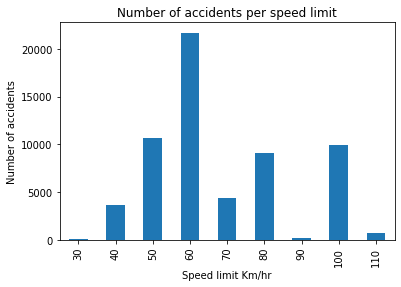

<Figure size 432x288 with 0 Axes>

In [42]:
# Plotting crash data
speed_chart = crash.plot(kind="bar", title="Number of accidents per speed limit")
speed_chart.set_xlabel("Speed limit Km/hr")
speed_chart.set_ylabel("Number of accidents")
plt.show()
plt.tight_layout()

In [43]:
# Calculate number of accidents in each speed limit as accident type
crash = crash_data.groupby(["SPEED_ZONE"])
crash_count= crash["SEVERITY"].value_counts()
crash_type = pd.DataFrame(crash_count)
crash_type

SEVERITY
SPEED_ZONE SEVERITY                         
30         Other injury accident          68
           Serious injury accident        29
40         Other injury accident        2752
           Serious injury accident       911
           Fatal accident                 20
50         Other injury accident        7631
           Serious injury accident      2956
           Fatal accident                 85
60         Other injury accident       15770
           Serious injury accident      5707
           Fatal accident                213
70         Other injury accident        3074
           Serious injury accident      1237
           Fatal accident                 73
80         Other injury accident        6110
           Serious injury accident      2853
           Fatal accident                169
90         Other injury accident         131
           Serious injury accident        84
           Fatal accident                 11
100        Other injury accident        5526
           Serious injury accident      3893
           Fatal accident                505
110        Other injury accident         374
           Serious injury accident       285
           Fatal accident                 43

Text(0.5, 0, 'Number of accidents')

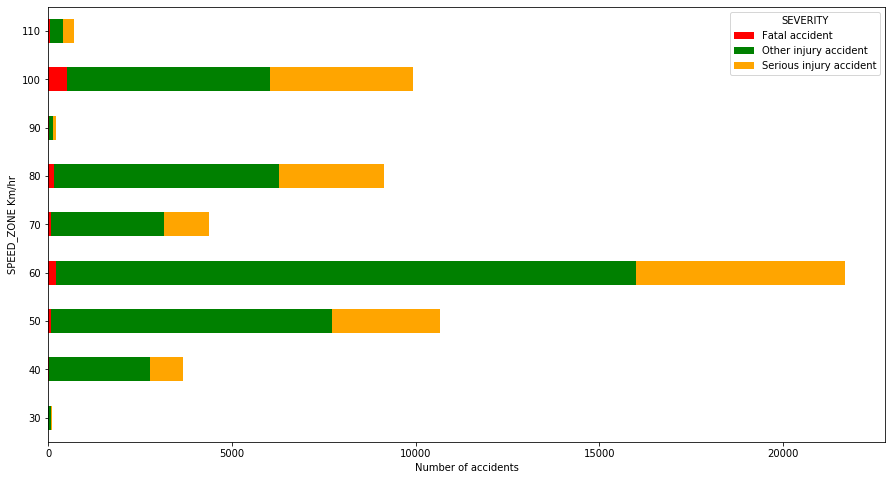

In [44]:
# Plotting chart showing speed limit to severity
c2 = crash_data.groupby(["SPEED_ZONE"])
crash_count2= crash["SEVERITY"].value_counts().unstack('SEVERITY').fillna(0)
c4 = crash_count2.plot(kind='barh', stacked=True, figsize=(15,8), color=['red', 'green', 'orange'])
c4.set_ylabel("SPEED_ZONE Km/hr")
c4.set_xlabel("Number of accidents")


In [45]:
# Used bins to test range rather that each speed limit separately 
bins = [0,51,81,115]
names = ["30-50","60-80","90-110"]
crash_data["bins"] = pd.DataFrame(pd.cut(crash_data["SPEED_ZONE"], bins, labels=names, include_lowest=True))
binsdf = crash_data.groupby(["bins"])
total_count = binsdf["SEVERITY"].value_counts()
uniquesn_bindf = pd.DataFrame({ "Total Count": total_count})
uniquesn_bindf

Total Count
bins   SEVERITY                            
30-50  Other injury accident          10451
       Serious injury accident         3896
       Fatal accident                   105
60-80  Other injury accident          24954
       Serious injury accident         9797
       Fatal accident                   455
90-110 Other injury accident           6031
       Serious injury accident         4262
       Fatal accident                   559

In [46]:
# Calculate percentage for plotting 100% bar chart
percents_df2 = uniquesn_bindf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
pd.options.display.float_format = '{:,.2f}%'.format
percents_df2

Total Count
bins   SEVERITY                            
30-50  Other injury accident         72.32%
       Serious injury accident       26.96%
       Fatal accident                 0.73%
60-80  Other injury accident         70.88%
       Serious injury accident       27.83%
       Fatal accident                 1.29%
90-110 Other injury accident         55.58%
       Serious injury accident       39.27%
       Fatal accident                 5.15%

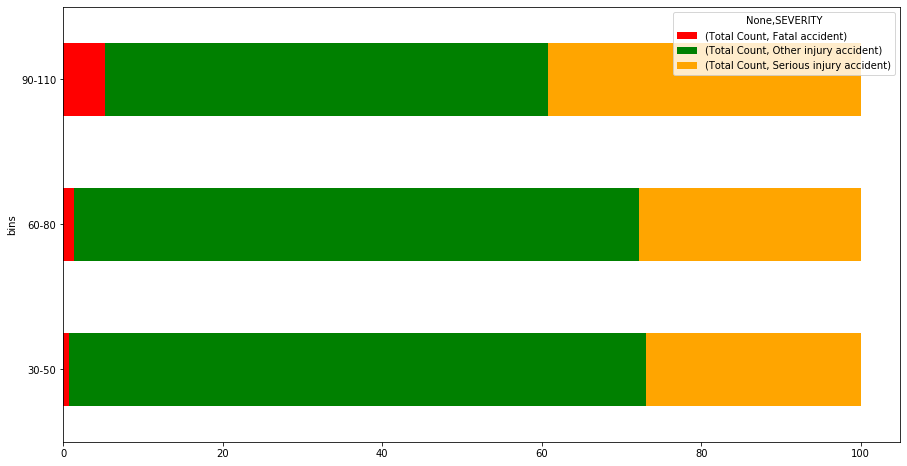

In [47]:
percents_df2.unstack().plot.barh(stacked=True, figsize=(15,8), color=['red', 'green', 'orange'])

In [57]:
# Calculate number of accidents in each speed limit as light condition
crash = crash_data.groupby(["LIGHT_CONDITION"])
crash_count= crash["SEVERITY"].value_counts()
c = pd.DataFrame(crash_count)
c

SEVERITY
LIGHT_CONDITION        SEVERITY                         
Dark No street lights  Other injury accident        1796
                       Serious injury accident      1369
                       Fatal accident                197
Dark Street lights off Other injury accident          90
                       Serious injury accident        39
                       Fatal accident                  6
Dark Street lights on  Other injury accident        6215
                       Serious injury accident      3183
                       Fatal accident                171
Day                    Other injury accident       27619
                       Serious injury accident     11201
                       Fatal accident                641
Dusk/Dawn              Other injury accident        4792
                       Serious injury accident      2003
                       Fatal accident                 96

Text(0.5, 0, 'Number of accidents')

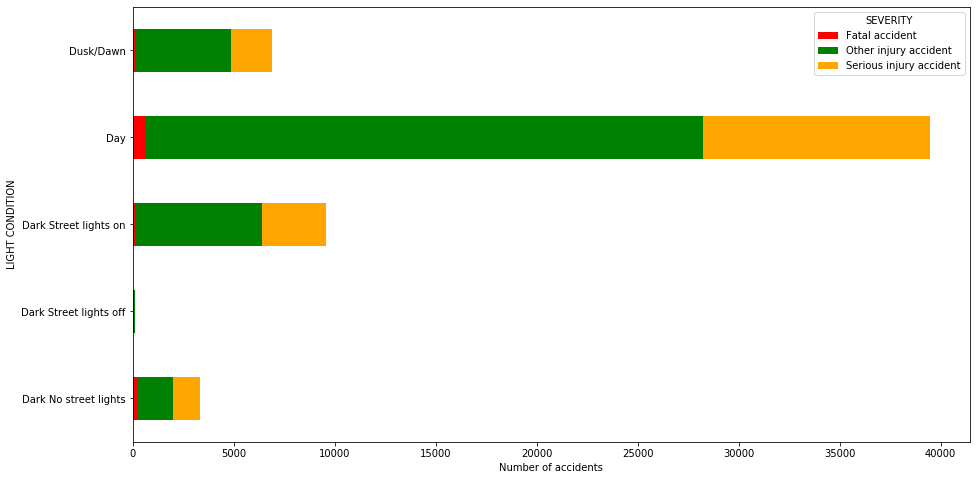

In [58]:
# # Plotting chart showing light condition to severity

c5 = crash_data.groupby(["LIGHT_CONDITION"])
crash_count5= c5["SEVERITY"].value_counts().unstack('SEVERITY').fillna(0)
c6 = crash_count5.plot(kind='barh', stacked=True, figsize=(15,8), color=['red', 'green', 'orange'])
c6.set_ylabel("LIGHT CONDITION")
c6.set_xlabel("Number of accidents") 

In [59]:
# Calculate percentage for plotting 100% bar chart
percents_df = c.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
pd.options.display.float_format = '{:,.2f}%'.format
percents_df

SEVERITY
LIGHT_CONDITION        SEVERITY                         
Dark No street lights  Other injury accident      53.42%
                       Serious injury accident    40.72%
                       Fatal accident              5.86%
Dark Street lights off Other injury accident      66.67%
                       Serious injury accident    28.89%
                       Fatal accident              4.44%
Dark Street lights on  Other injury accident      64.95%
                       Serious injury accident    33.26%
                       Fatal accident              1.79%
Day                    Other injury accident      69.99%
                       Serious injury accident    28.38%
                       Fatal accident              1.62%
Dusk/Dawn              Other injury accident      69.54%
                       Serious injury accident    29.07%
                       Fatal accident              1.39%

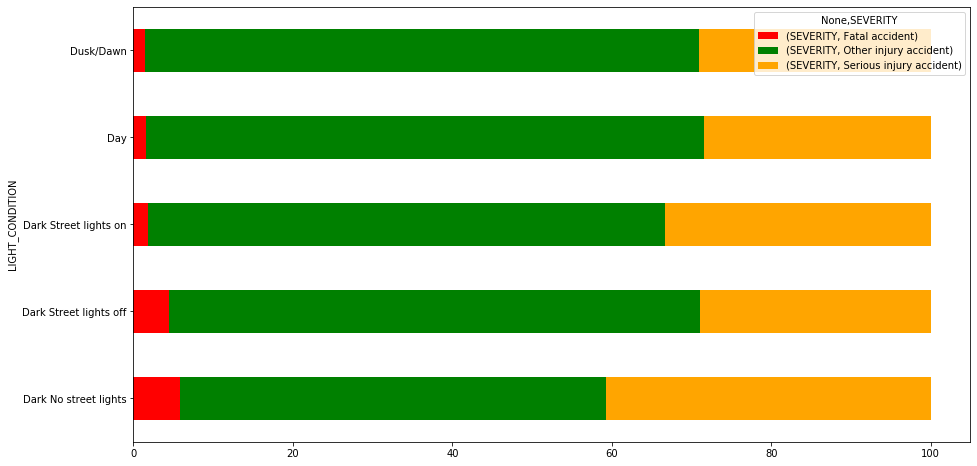

In [60]:
percents_df.unstack().plot.barh(stacked=True, figsize=(15,8), color=['red', 'green', 'orange'])